# Machine Learning - Regression
* ## Tips Preiction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv'
df = pd.read_csv(url)

In [2]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

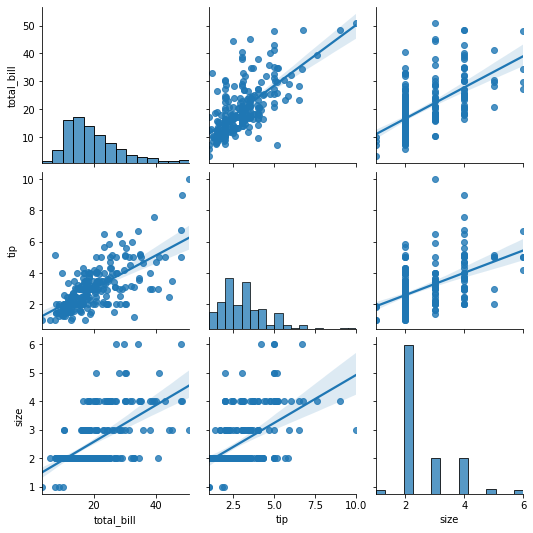

In [3]:
sns.pairplot(df, kind='reg')

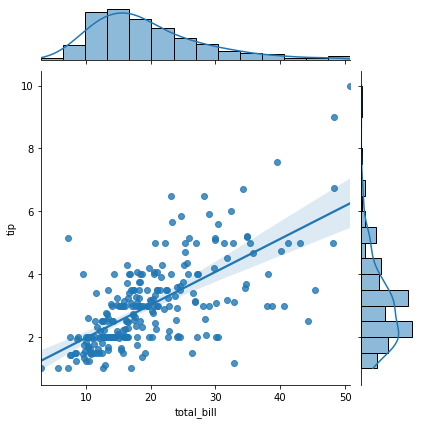

In [4]:
sns.jointplot(x = df.total_bill, y = df.tip, kind='reg')

<AxesSubplot:>

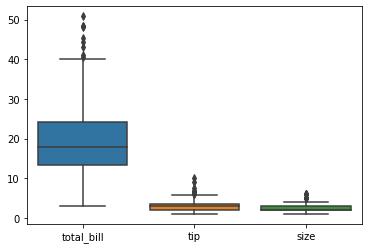

In [5]:
sns.boxplot(data = df)

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:>

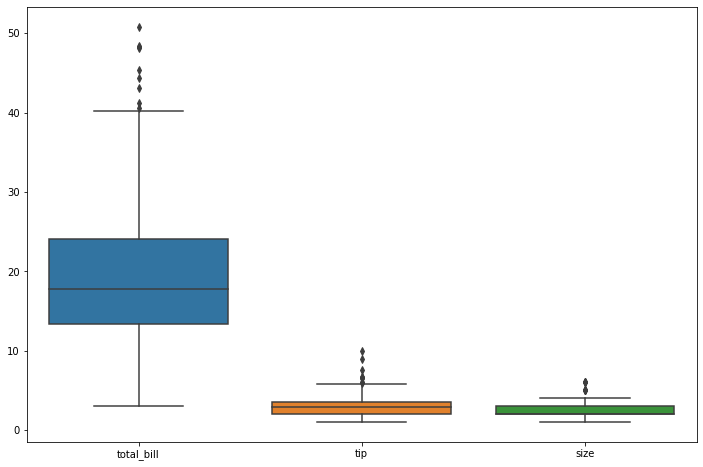

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df)

# Encoder

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

df_raw = df.copy()
df_raw.drop('tip', axis=1, inplace=True)

sex_pipeline = Pipeline([
            ('null', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='if_binary')),])

day_pipeline = Pipeline([
         ('order', OrdinalEncoder(categories=[['Thur','Fri','Sat','Sun']])),
         ('scaler', MinMaxScaler()),])

prepreocess_pipelines = ColumnTransformer([
     ('imputer', sex_pipeline,    ['sex']),
     ('onehot',  OneHotEncoder(drop='if_binary'), ['smoker','time']),    
     ('ordinal', day_pipeline ,   ['day']),
     ('scaler',  MinMaxScaler(),  ['total_bill']),
], remainder='drop')

df_prepared = prepreocess_pipelines.fit_transform(df_raw)


df_final = pd.DataFrame(df_prepared)

df_final.columns = ['sex_male', 'smoker_yes', 'time_lunch', 'day', 'total_bill'] 
df_final

sex_male  smoker_yes  time_lunch       day  total_bill
0         0.0         0.0         0.0  1.000000    0.291579
1         1.0         0.0         0.0  1.000000    0.152283
2         1.0         0.0         0.0  1.000000    0.375786
3         1.0         0.0         0.0  1.000000    0.431713
4         0.0         0.0         0.0  1.000000    0.450775
..        ...         ...         ...       ...         ...
239       1.0         0.0         0.0  0.666667    0.543779
240       0.0         1.0         0.0  0.666667    0.505027
241       1.0         1.0         0.0  0.666667    0.410557
242       1.0         0.0         0.0  0.666667    0.308965
243       0.0         0.0         0.0  0.000000    0.329074

[244 rows x 5 columns]

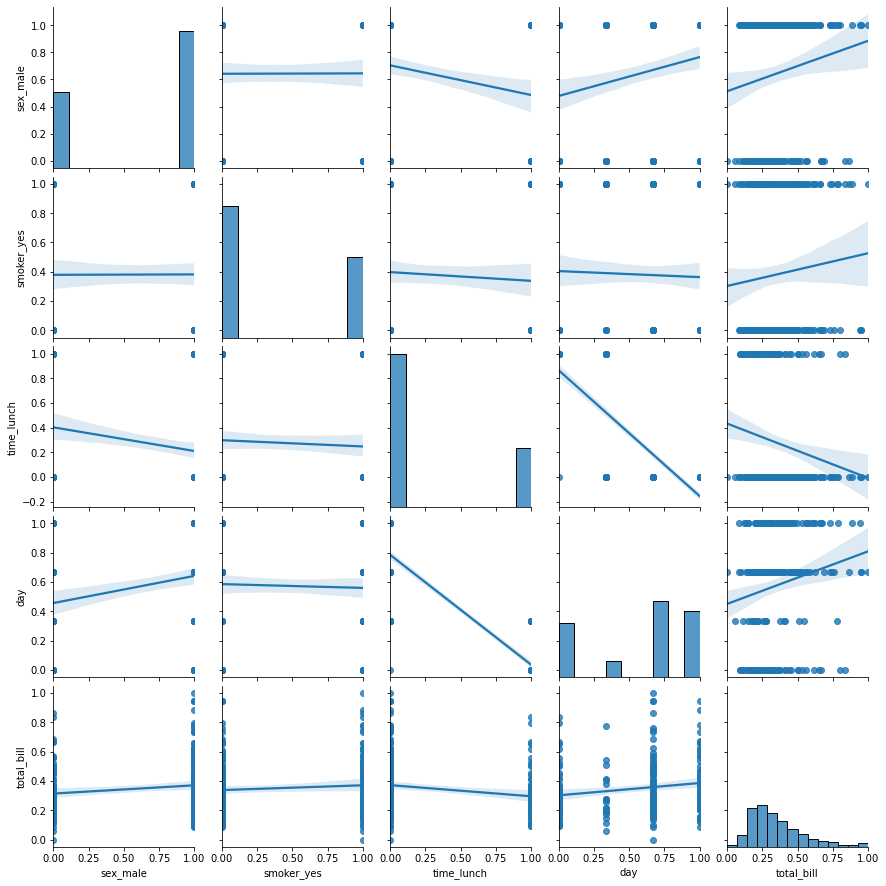

In [10]:
sns.pairplot(df_final, kind='reg')

<AxesSubplot:>

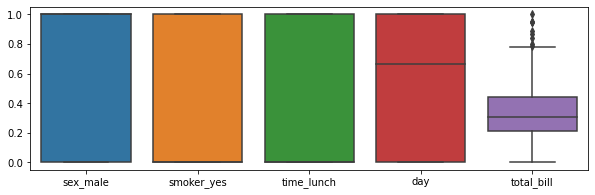

In [11]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(data=df_final)

In [12]:
from sklearn.model_selection import train_test_split
X = df_final
y = df.tip
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


model = DecisionTreeRegressor()

model.fit(X_train, y_train)
pred = model.predict(X_test) 
mse = mean_squared_error(y_test, pred) 

print('MSE: '+ str(mse))
print('RMSE: '+ str(np.sqrt(mse))) 

MSE: 1.0578324324324324
RMSE: 1.0285098115392155


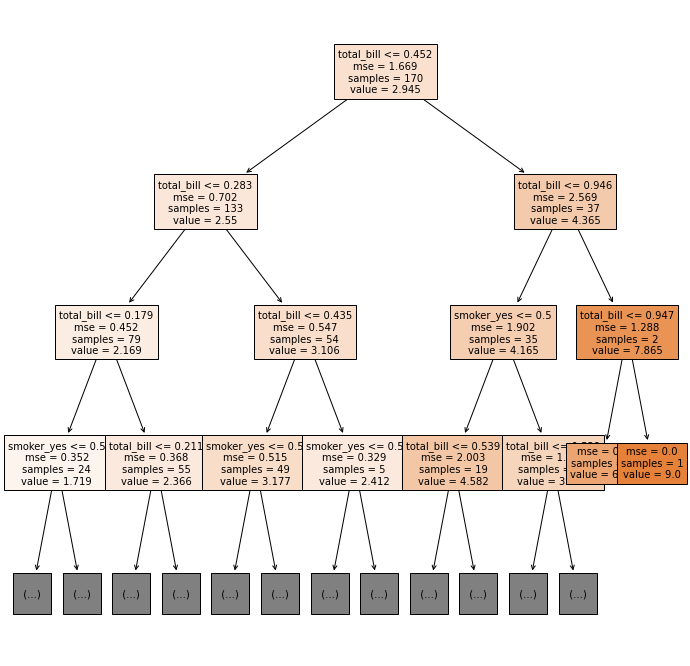

In [14]:
tree = model
fig = plt.figure(figsize=(12, 12))
plot_tree(tree, filled=True, fontsize=10, max_depth=3, feature_names=X_train.columns,)
plt.savefig('tips_decision_tree_plot_tree.png', dpi=100) # save and show

# Prediction

In [35]:
pred_data = pd.DataFrame([[19.5, 0, 'Female', 'No', 'Thur', 'Lunch', 3]], columns = df.columns)
pred_data.drop('tip', inplace=True, axis=1) 
pred_data = prepreocess_pipelines.transform(pred_data) 

# prediction
unseen_pred = model.predict(pred_data)
print(unseen_pred)# Tips = $3.18

[3.18]
